### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("./Red_Wine_Data.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### There are no missing values so data cleaning is not required

In [4]:
unnamed_cols  =  df.columns.str.contains('Unnamed')
unnamed_cols

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [5]:
backup = df.copy

#### Dropping the unnamed index column as already have our default index

In [6]:
df = df.drop(df[df.columns[unnamed_cols]], axis=1)

In [10]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Feature Engineering

In [14]:
df['quality'] = df['quality'].apply(lambda x : 1 if x > 6.5 else 0)

In [16]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Preparing our model

In [17]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
print("X_train ", X_train.shape)
print("y_train ", Y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", Y_test.shape)

X_train  (1279, 11)
y_train  (1279,)
X_test  (320, 11)
y_test  (320,)


### Training Model

In [32]:
lgrg = LogisticRegression()
lgrg.fit(X_train, Y_train)
lgrg_pred = lgrg.predict(X_test)
lgrg_acc = accuracy_score(lgrg_pred, Y_test)

C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculating Accuracy

In [36]:
print("Accuracy of this model =  {:.2f}%".format(lgrg_acc*100))

Accuracy of this model =  86.56%


TN:  267
FN:  37
TP:  10
FP:  6


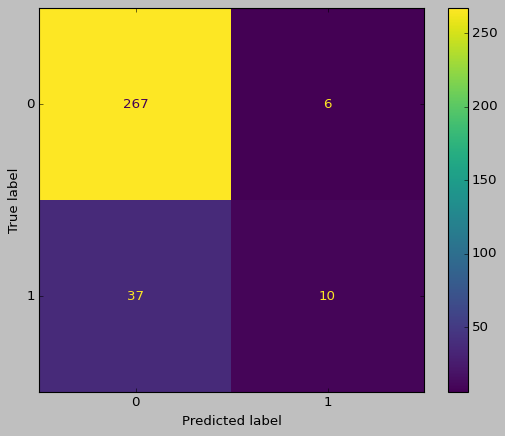

In [55]:
style.use('classic')
cm = confusion_matrix(Y_test, lgrg_pred, labels=lgrg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=lgrg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])